# Manifold Learning Methods

## MNIST Digits

Use data form https://www.kaggle.com/c/digit-recognizer/data and suppose that files test.csv and train.csv are in same folder as notebook. You can use subsamples to spead up your calculations.

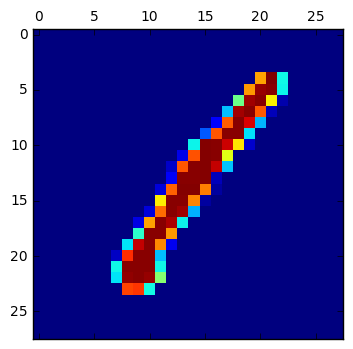

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import manifold

def apply_method(method):
    model.fit(X)
    Y = model.fit_transform(X)
    plt.figure(figsize=(15, 8))
    plt.scatter(Y[:, 0], Y[:, 1], c=color, cmap='jet')
    plt.title(method)

# (1 point) load train data, save class labels, plot first point as a digit
mnist = pd.read_csv('train.csv')
X = mnist.iloc[:5000, 1:]
color = mnist['label'][:5000]
plt.matshow(X.iloc[0].values.reshape(28, -1))
plt.show()

In [2]:
# Apply Isomap, Locally Linear Embedding, Spectral Embedding, Local Tangent Space Alignment, Multi-dimensional Scaling, t-distributed Stochastic Neighbor Embedding
# (5 points) apply methods to reduce dimension to two
# (3 points) plot results where the different digits are represented with different styles/colors
# (1 point) apply Out-of-Sample Isomap to an arbitrary point
# (1 point) make a conclusion

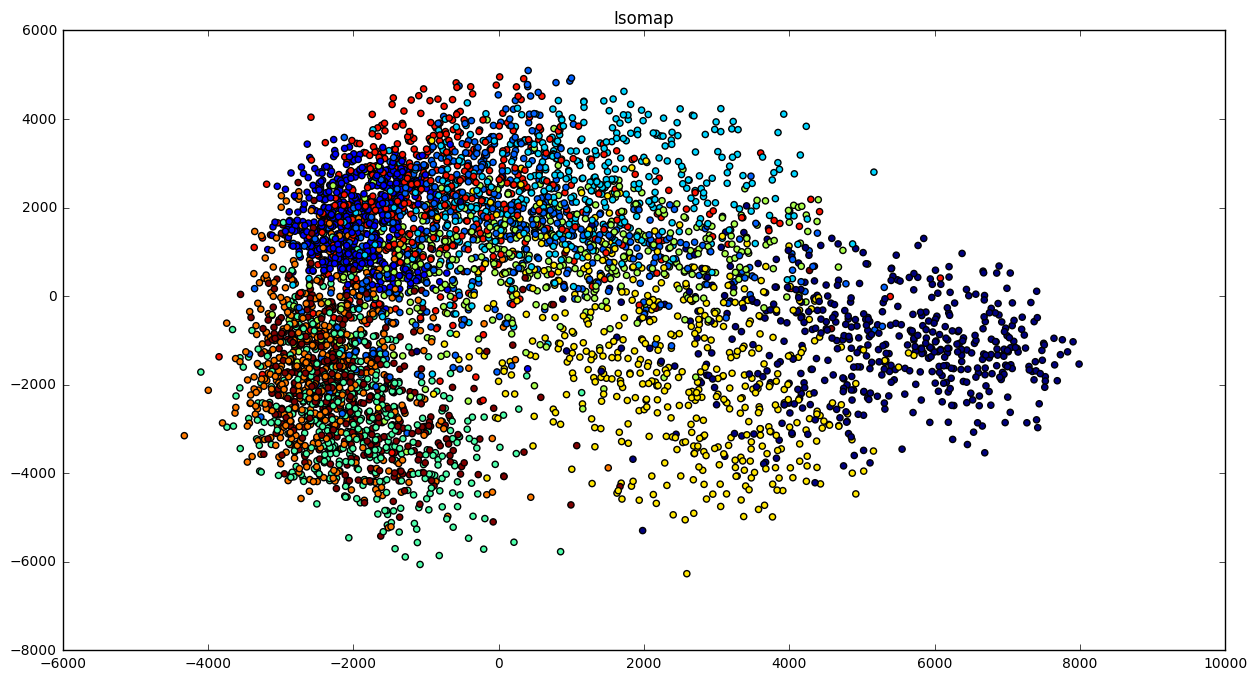

In [2]:
model = manifold.Isomap(n_neighbors=10, n_components=2)
apply_method("Isomap")

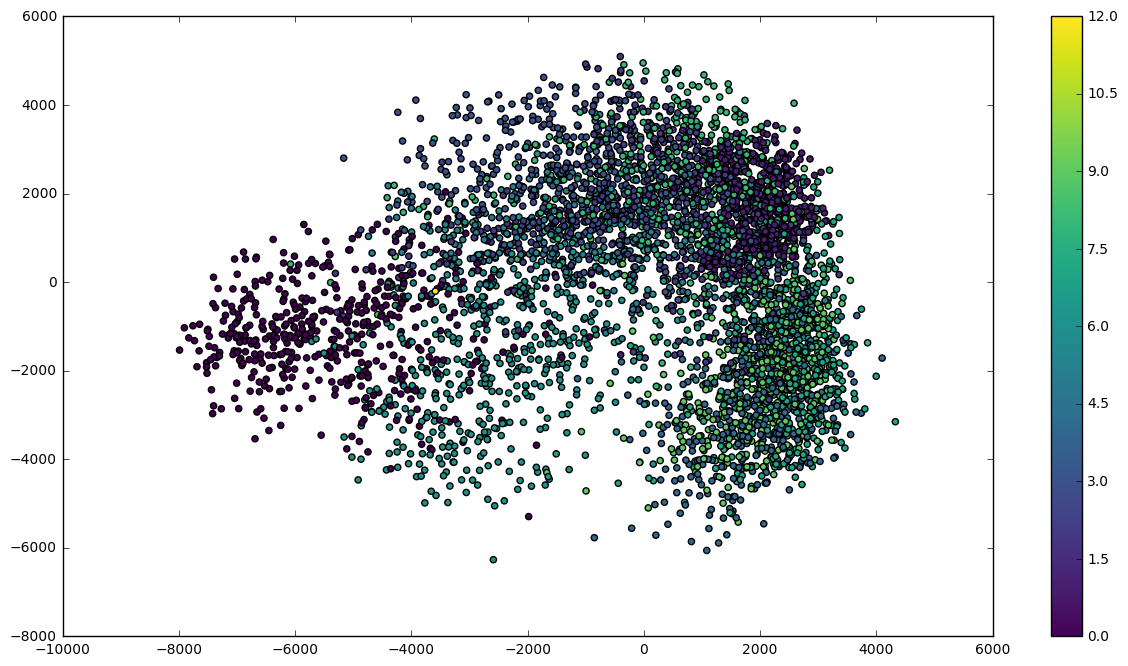

In [6]:
npoint = mnist.iloc[5003, 1:]
lnpoint = mnist.iloc[5003, 0]
tr_npoint = model.transform([npoint])
Y = model.fit_transform(X)
Y_with_npoint = np.vstack((Y, tr_npoint))
color = np.array(color)
new_color = np.hstack((color, np.array([12])))
plt.figure(figsize=(15, 8))
plt.scatter(*zip(*Y_with_npoint), c=new_color, cmap="viridis")
plt.colorbar()
plt.show()

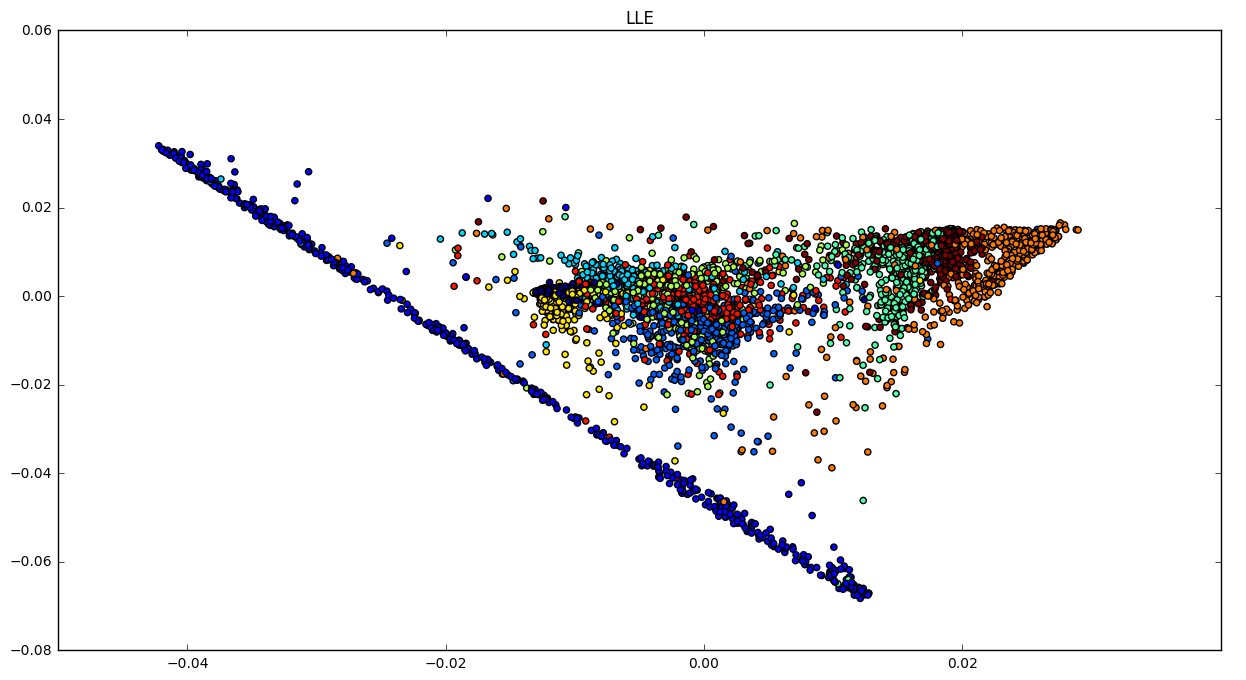

In [3]:
model = manifold.LocallyLinearEmbedding(n_neighbors=10, n_components=2, method='standard', eigen_solver='dense')
apply_method("LLE")

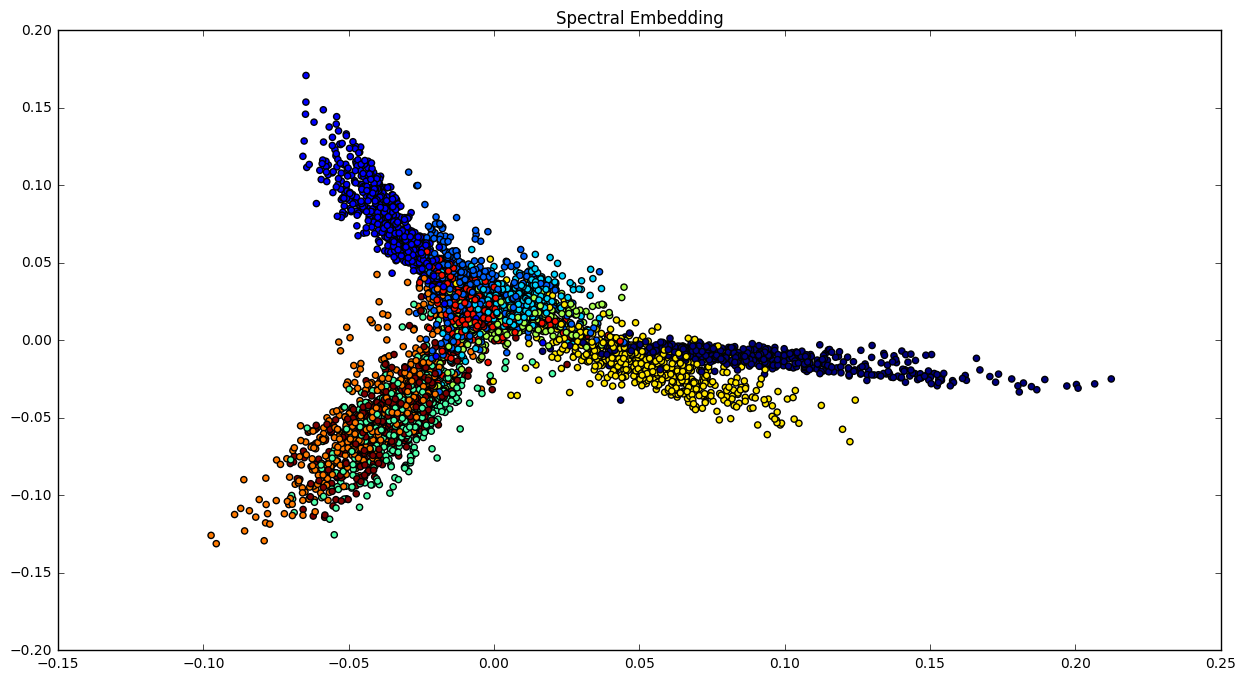

In [4]:
model = manifold.SpectralEmbedding(n_components=2, n_neighbors=10)
apply_method("Spectral Embedding")

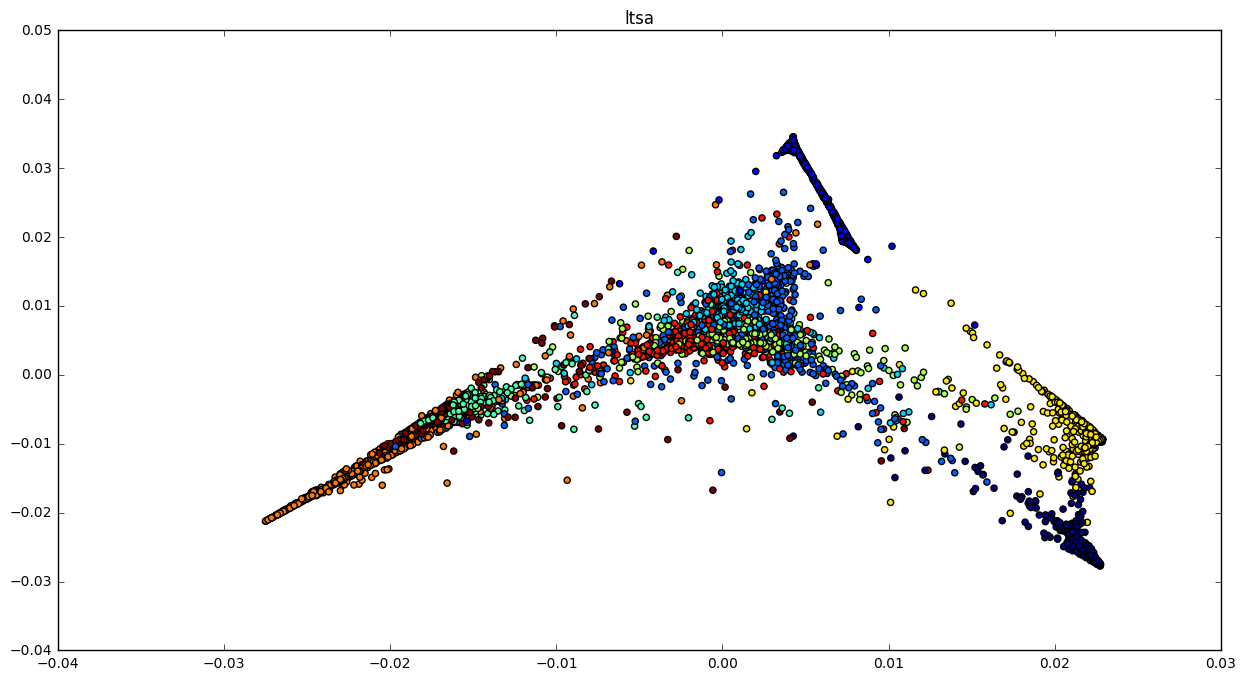

In [9]:
model = manifold.LocallyLinearEmbedding(n_neighbors=5, n_components=2, method='standard', eigen_solver='auto')
apply_method("ltsa")

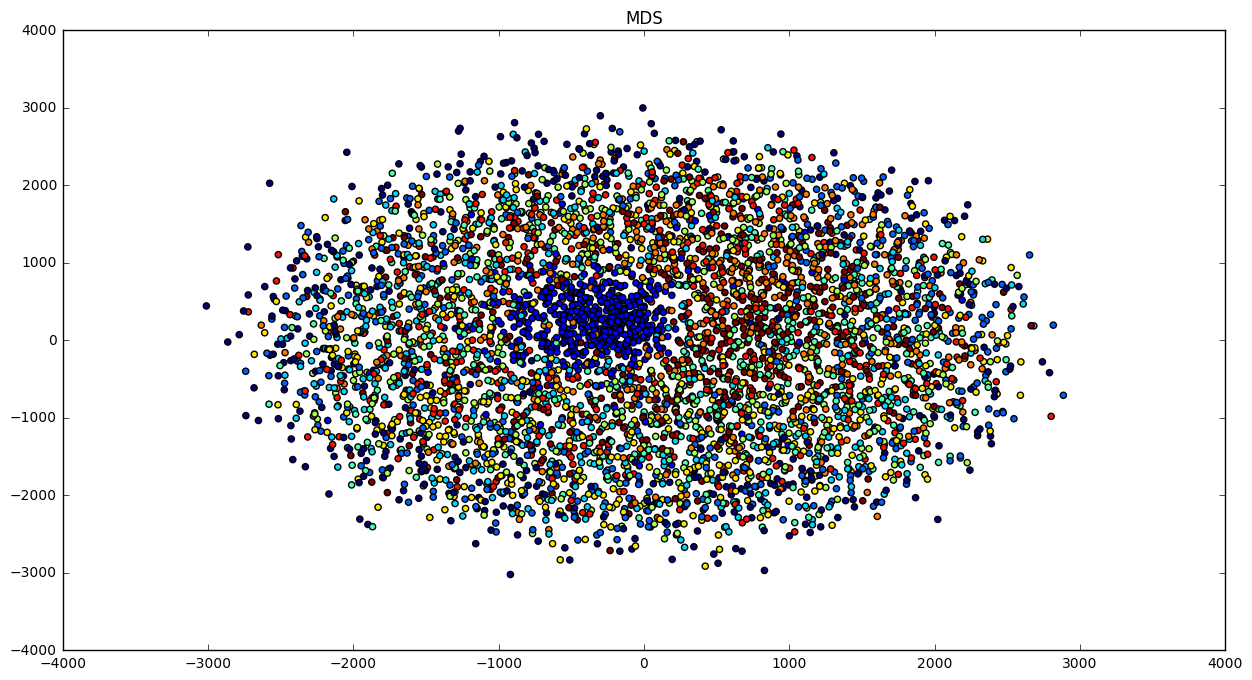

In [5]:
model = manifold.MDS(n_components=2, max_iter=100, n_init=1)
apply_method("MDS")

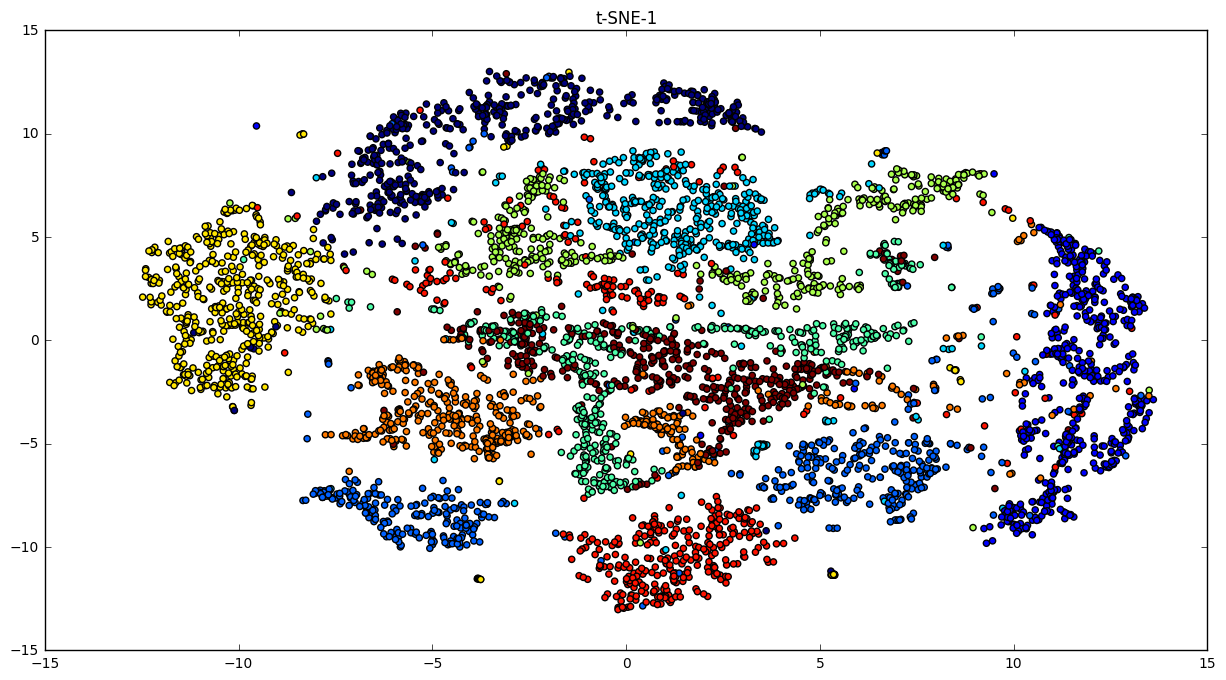

In [6]:
model = manifold.TSNE(n_components=2, random_state=1)
apply_method("t-SNE-1")

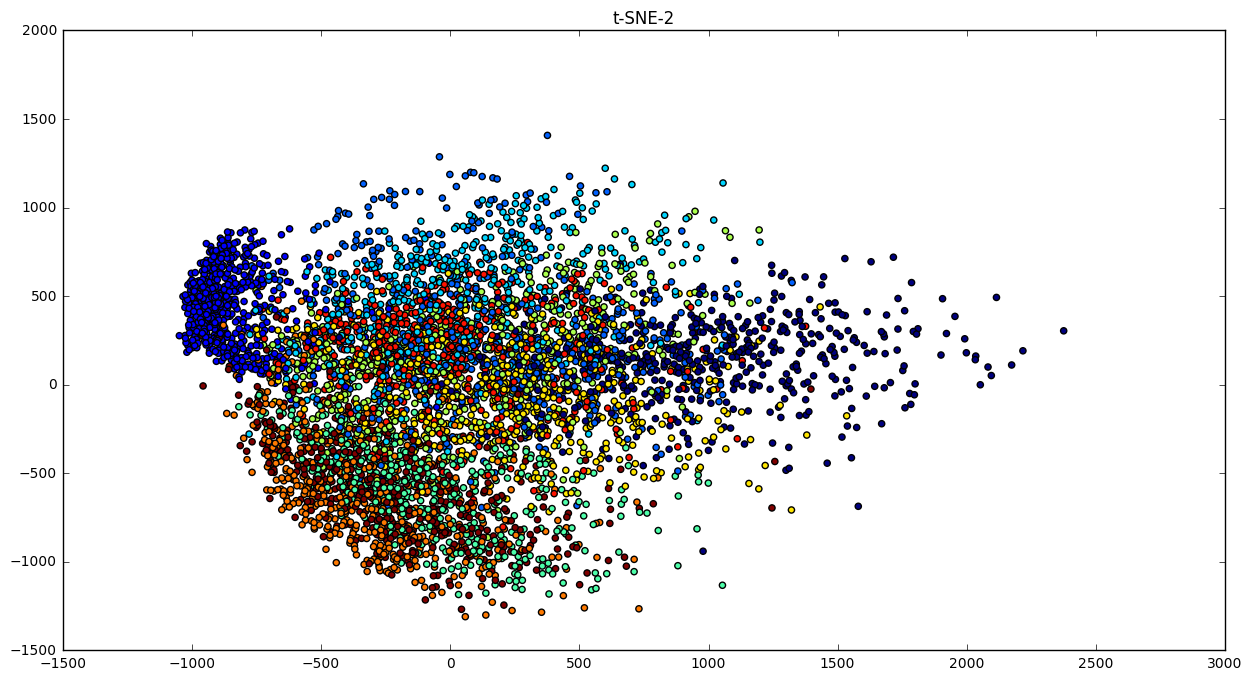

In [7]:
model = manifold.TSNE(n_components=2, init='pca', random_state=0)
apply_method("t-SNE-2")

Заключение.
Существуют различные подходы и методы для уменьшения размерности данных. Из рассмотренных в этом задании, более качественным для MNIST оказался метод t-SNE, но при этом время его работы было самым большим. Алгоритмы SpectralEmbeddin и Locally Linear Embedding подействовали быстрее остальных. Однако, на полных данных даже эти методы работают очень долго.